# Problem 2

The problem that was given is as follows

> The goal of this exercise is to create a generative adversarial network to reproduce the tabular data found [eICU_age.npy](https://github.com/JeffersonLab/jlab_datascience_data/blob/main/eICU_age.npy). The dataset includes the ages of critical care patients seen across intensive care units in the United States. The original data is from the eICU Collaborative Research Database [eicu](https://eicu-crd.mit.edu/about/eicu/).
To solve this problem implement a generative adversarial network (GAN) in python to produce the distri- bution of age for these patients. Your script must coordinate both the generator and discriminator models. Please provide figures to illustrate this coordination and compare the distribution from the generator model output with that of the true distribution.

## Data

The data corresponds to distribution of ICU Patients through out USA within a fixed age group. The data in "unbinned". 



Min is : 15, Max is : 90
Number of unique ages : 76


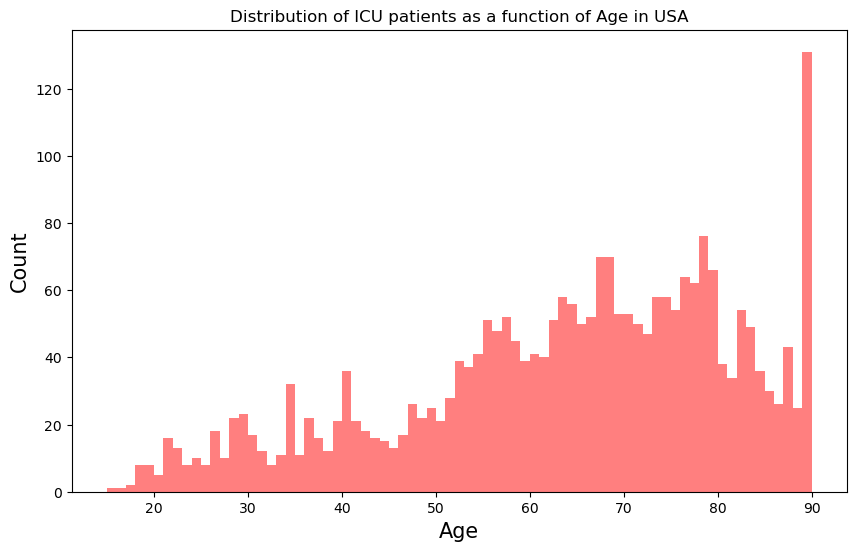

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_path = "data/eICU_age.npy"

in_arr = np.array([i[0] for i in np.load(data_path)]) # note that this array is of type int i8
min_age = np.min(in_arr)
max_age = np.max(in_arr)
# Print min max of the array to 
print (f"Min is : {min_age}, Max is : {max_age}")

# Print #of unique ages in the array
print (f"Number of unique ages : {len(np.unique(in_arr))}")

plt.figure(1, figsize = (10, 6))
hist = plt.hist(in_arr, range = (min_age, max_age), bins = max_age - min_age, color = 'r', alpha = 0.5)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Distribution of ICU patients as a function of Age in USA")
plt.show()



# Normalize First

It is better to convert the absolute numbers into its `density` or `PDFs`. I see this distribution as a data sequence of length `76`. The value of the elements in the array is simply the probabilty distribution. 


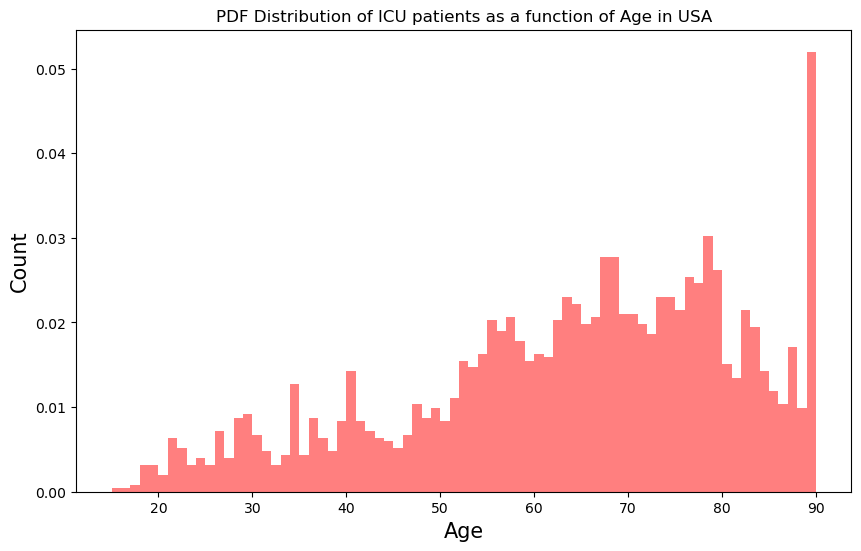


 Data looks like the following (1D Sequence) for rest of the study 
 
 :::::: [0.00039683 0.00039683 0.00079365 0.0031746  0.0031746  0.00198413
 0.00634921 0.00515873 0.0031746  0.00396825 0.0031746  0.00714286
 0.00396825 0.00873016 0.00912698 0.00674603 0.0047619  0.0031746
 0.00436508 0.01269841 0.00436508 0.00873016 0.00634921 0.0047619
 0.00833333 0.01428571 0.00833333 0.00714286 0.00634921 0.00595238
 0.00515873 0.00674603 0.01031746 0.00873016 0.00992063 0.00833333
 0.01111111 0.01547619 0.01468254 0.01626984 0.0202381  0.01904762
 0.02063492 0.01785714 0.01547619 0.01626984 0.01587302 0.0202381
 0.02301587 0.02222222 0.01984127 0.02063492 0.02777778 0.02777778
 0.02103175 0.02103175 0.01984127 0.01865079 0.02301587 0.02301587
 0.02142857 0.02539683 0.02460317 0.03015873 0.02619048 0.01507937
 0.01349206 0.02142857 0.01944444 0.01428571 0.01190476 0.01031746
 0.01706349 0.00992063 0.05198413]


In [5]:
plt.figure(1, figsize = (10, 6))
hist = plt.hist(in_arr, range = (min_age, max_age), bins = max_age - min_age, color = 'r', alpha = 0.5, density = True)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("PDF Distribution of ICU patients as a function of Age in USA")
plt.show()

# Data looks like the following for the rest of the study

print (f"\n Data looks like the following (1D Sequence) for rest of the study \n \n :::::: {hist[0]}")

In [9]:
true_data = np.array([np.count_nonzero(in_arr == i) for i in np.unique(in_arr)])/len(in_arr)
true_data

array([0.00039683, 0.00039683, 0.00079365, 0.0031746 , 0.0031746 ,
       0.00198413, 0.00634921, 0.00515873, 0.0031746 , 0.00396825,
       0.0031746 , 0.00714286, 0.00396825, 0.00873016, 0.00912698,
       0.00674603, 0.0047619 , 0.0031746 , 0.00436508, 0.01269841,
       0.00436508, 0.00873016, 0.00634921, 0.0047619 , 0.00833333,
       0.01428571, 0.00833333, 0.00714286, 0.00634921, 0.00595238,
       0.00515873, 0.00674603, 0.01031746, 0.00873016, 0.00992063,
       0.00833333, 0.01111111, 0.01547619, 0.01468254, 0.01626984,
       0.0202381 , 0.01904762, 0.02063492, 0.01785714, 0.01547619,
       0.01626984, 0.01587302, 0.0202381 , 0.02301587, 0.02222222,
       0.01984127, 0.02063492, 0.02777778, 0.02777778, 0.02103175,
       0.02103175, 0.01984127, 0.01865079, 0.02301587, 0.02301587,
       0.02142857, 0.02539683, 0.02460317, 0.03015873, 0.02619048,
       0.01507937, 0.01349206, 0.02142857, 0.01944444, 0.01428571,
       0.01190476, 0.01031746, 0.01706349, 0.00992063, 0.05039

# Solution

## Objective

Let the objective for this section be to make a generator that will "exactly" reproduce the distribution. Then it is wise to simply "over train" the a Generator to produce only 1 "type" of distribution. 


## True data: 1D Scalar of length 76 

In [14]:
print (true_data)

[0.00039683 0.00039683 0.00079365 0.0031746  0.0031746  0.00198413
 0.00634921 0.00515873 0.0031746  0.00396825 0.0031746  0.00714286
 0.00396825 0.00873016 0.00912698 0.00674603 0.0047619  0.0031746
 0.00436508 0.01269841 0.00436508 0.00873016 0.00634921 0.0047619
 0.00833333 0.01428571 0.00833333 0.00714286 0.00634921 0.00595238
 0.00515873 0.00674603 0.01031746 0.00873016 0.00992063 0.00833333
 0.01111111 0.01547619 0.01468254 0.01626984 0.0202381  0.01904762
 0.02063492 0.01785714 0.01547619 0.01626984 0.01587302 0.0202381
 0.02301587 0.02222222 0.01984127 0.02063492 0.02777778 0.02777778
 0.02103175 0.02103175 0.01984127 0.01865079 0.02301587 0.02301587
 0.02142857 0.02539683 0.02460317 0.03015873 0.02619048 0.01507937
 0.01349206 0.02142857 0.01944444 0.01428571 0.01190476 0.01031746
 0.01706349 0.00992063 0.05039683 0.0015873 ]


## Generated Synthetic (Fake) data -> Same dimension as true data

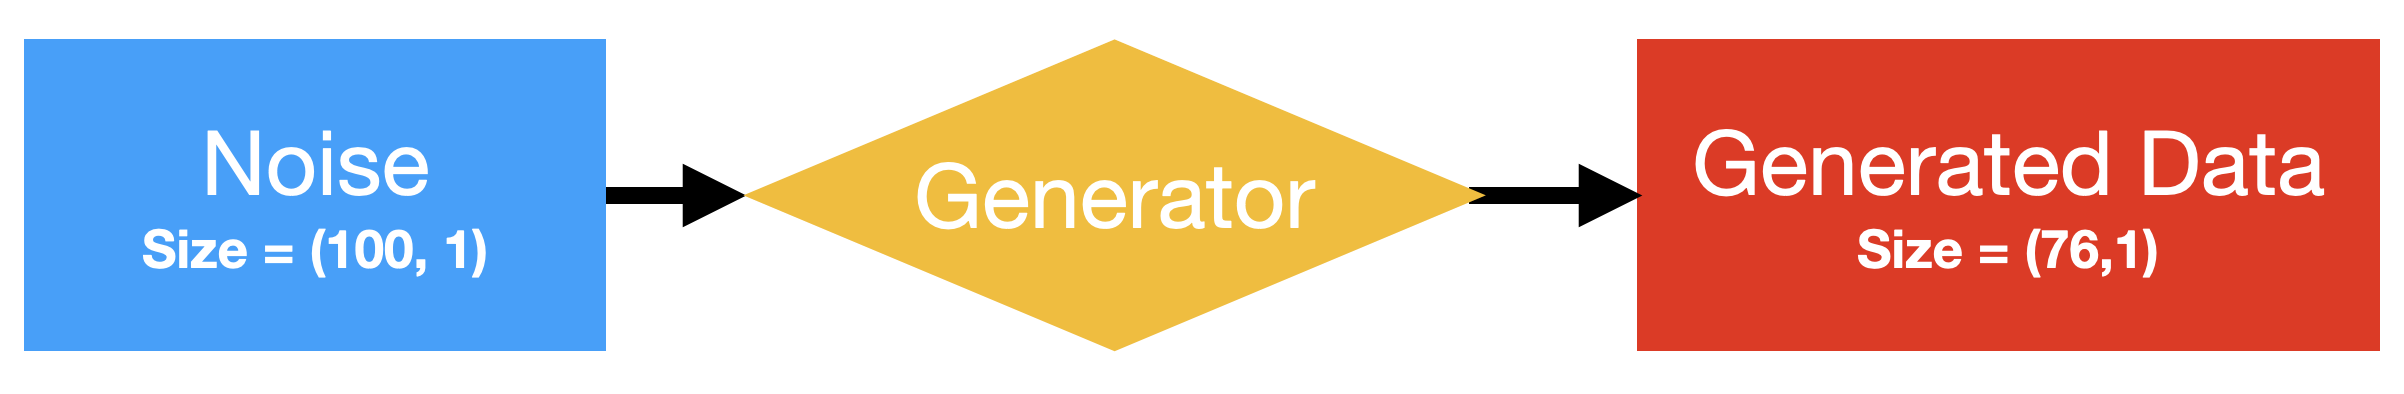

## Model Architecture

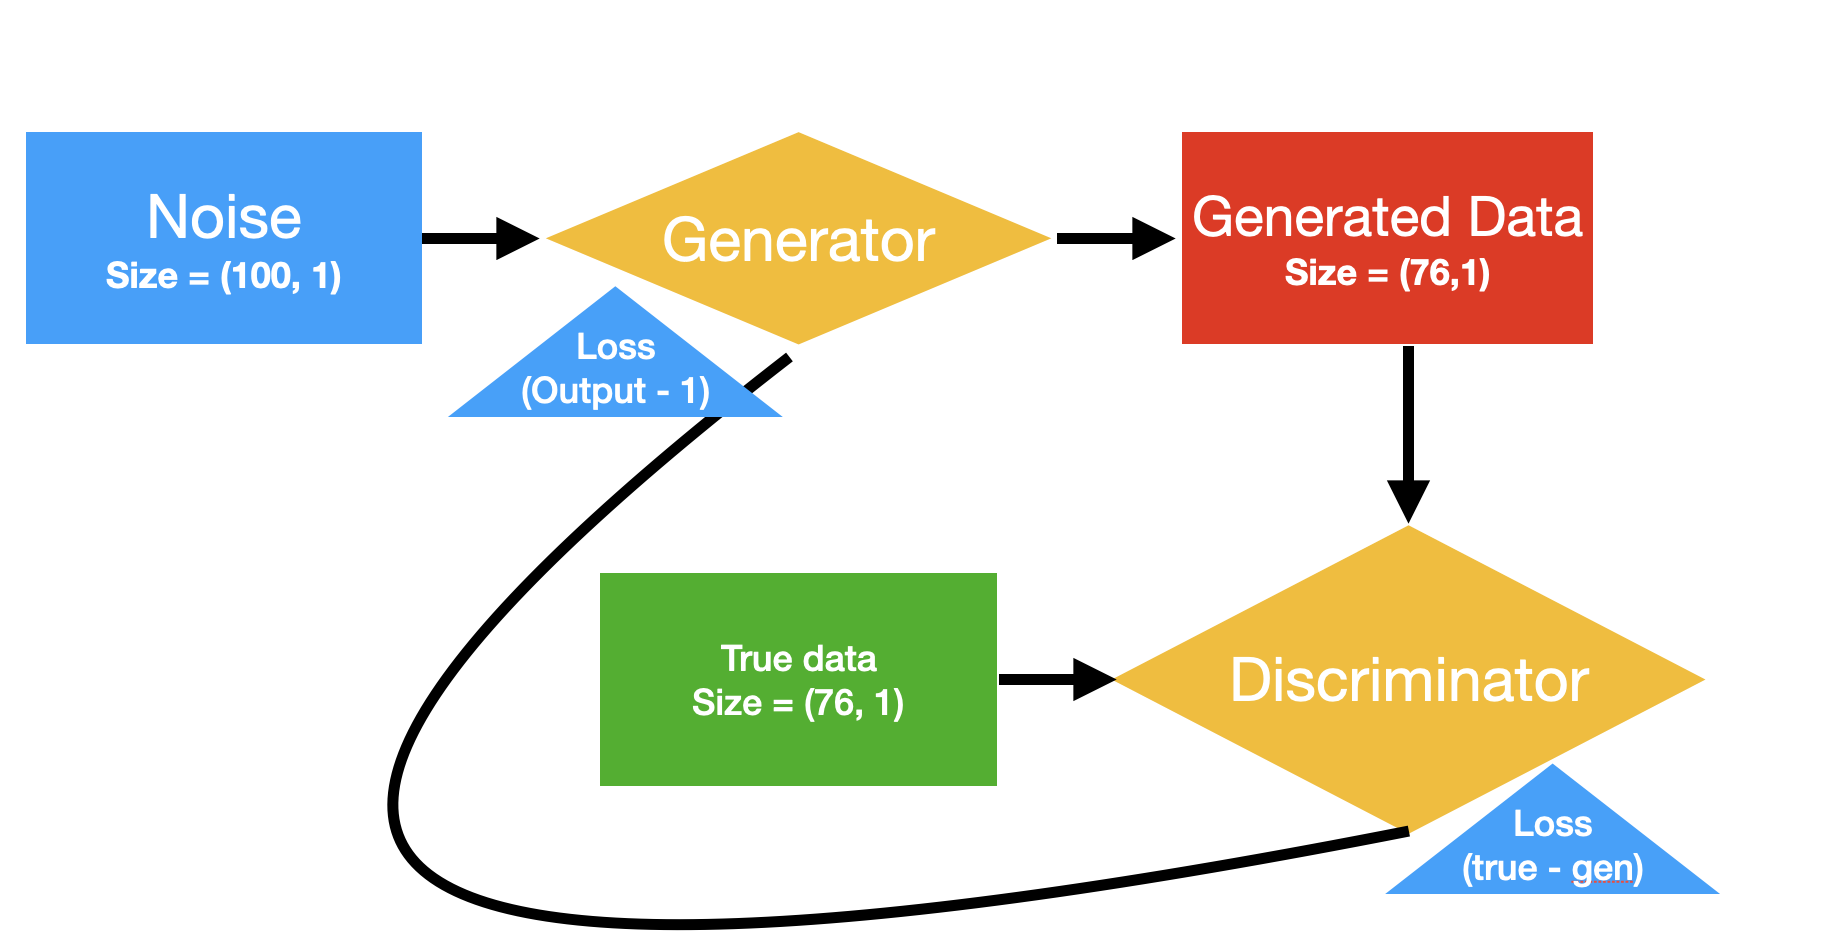

## Generator 

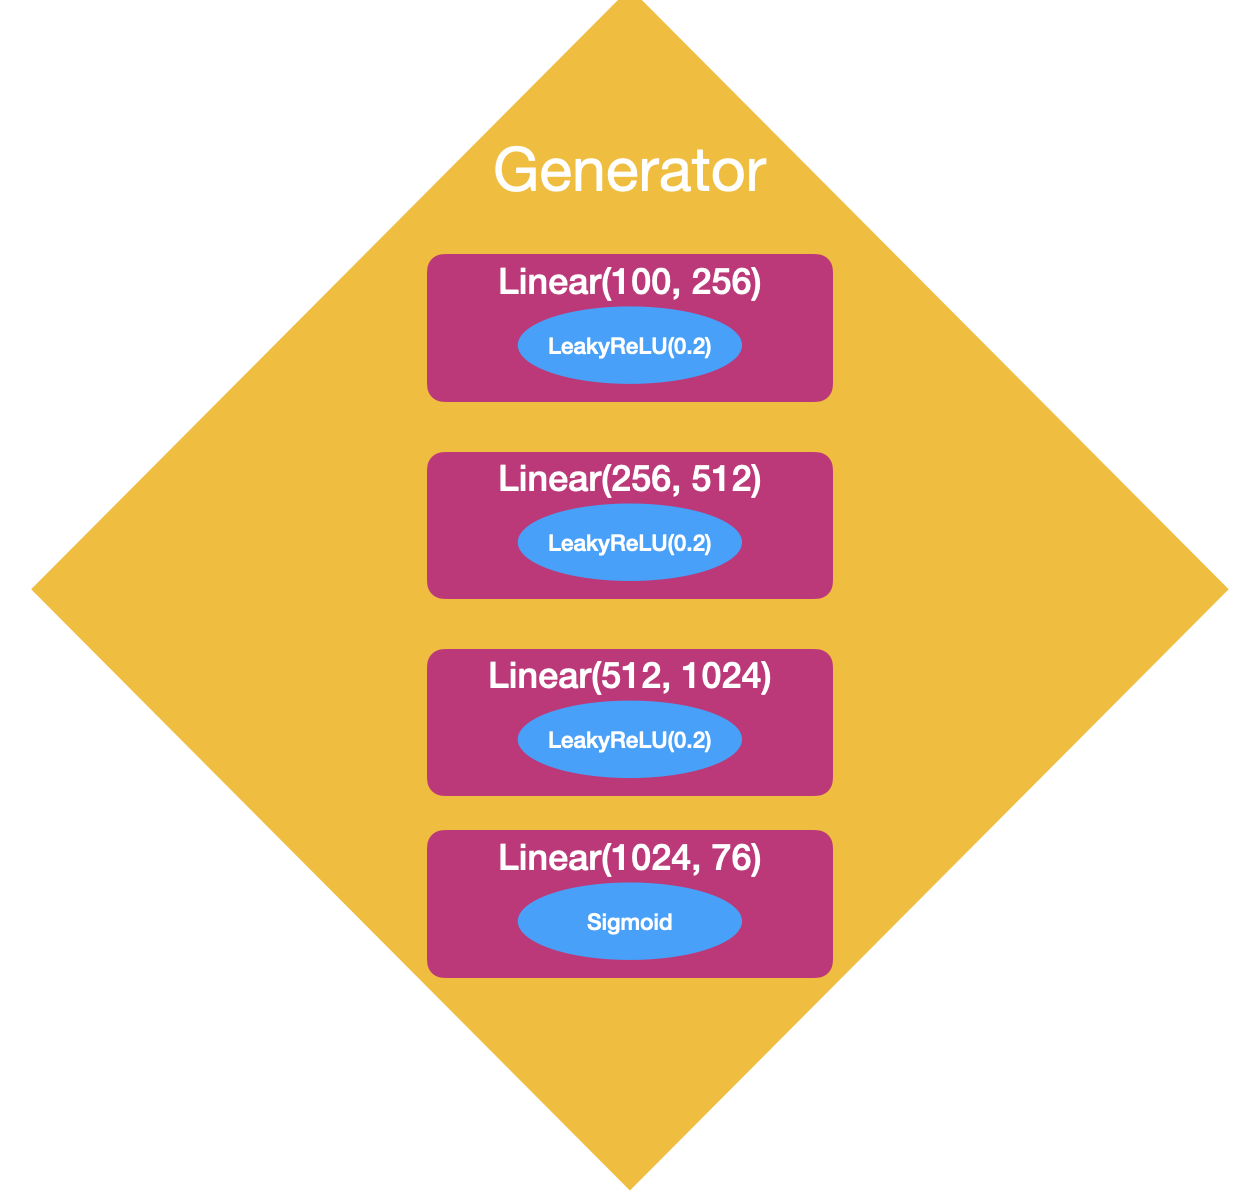

## Discriminator

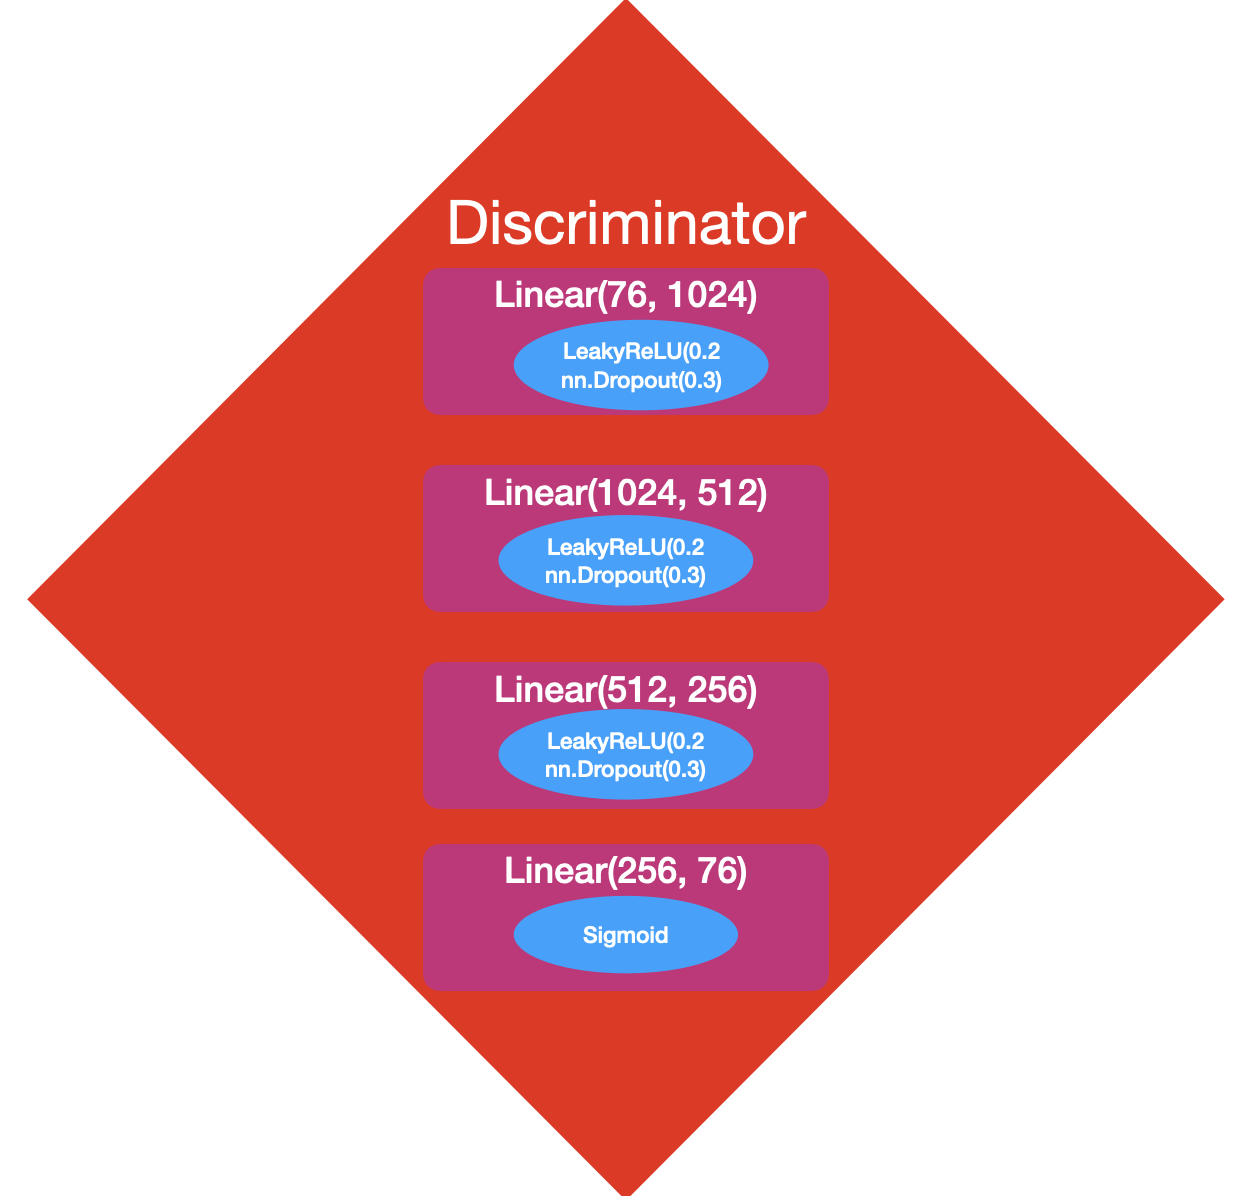

## loss function

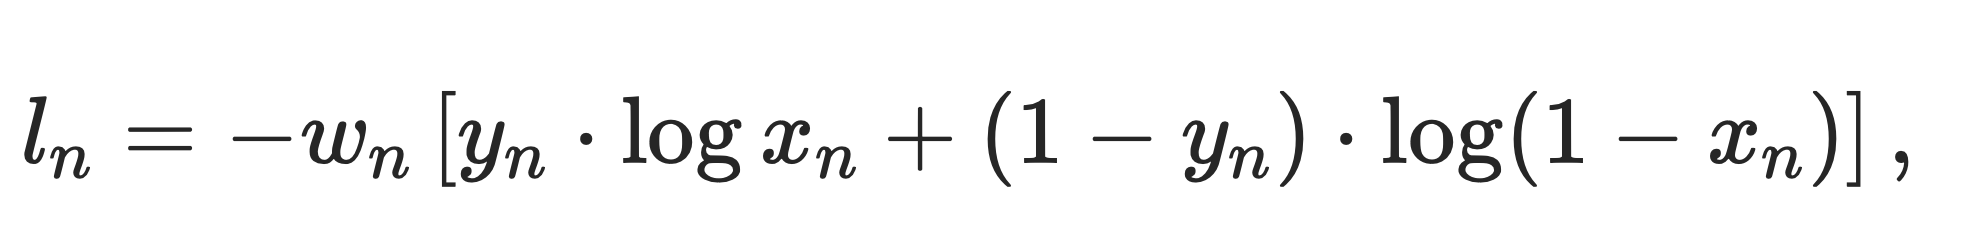

## Hyper-parameters

```
batch_size = 100
latent_dim = 100
epochs = 200
learning rate = 2e-04
Loss = Binary Cross Entropy

```

## Organization of the scripts

These scripts were used to train and develop the models. 
- Used `conda` environment for the problem. `python --version==3.10`. 
- To use the environment. `conda create --name <env> --file requirements.txt`
- `config.json` - Used to define inital setting for the experiment to take place. 
- `preprocessing.py` - `data_creator` and `data_loader` functionality'
- `models.py` - Contains various models that was used to solve the problem
- `Tboard.py` - Neccessary `tensorboard` utils
- `train_test.py` - All Training and testing is happening in that script
- `run.py` - A simple parallelization script used to run different experiments (this was used to run a few of the configurations)

One can run ```python train_test.py --config desired_config.json``` to get the code working.

## Training

During the training, The first thing to look at is how the fake and true data looks like as a function of epochs

![image](training_evolution_problem2.gif)

And also looking at the difference to see how it performs

![image](difference_evolution_problem2.gif)


## Testing

Finally what I did was to generate 1000 samples using generate and compared it with the 

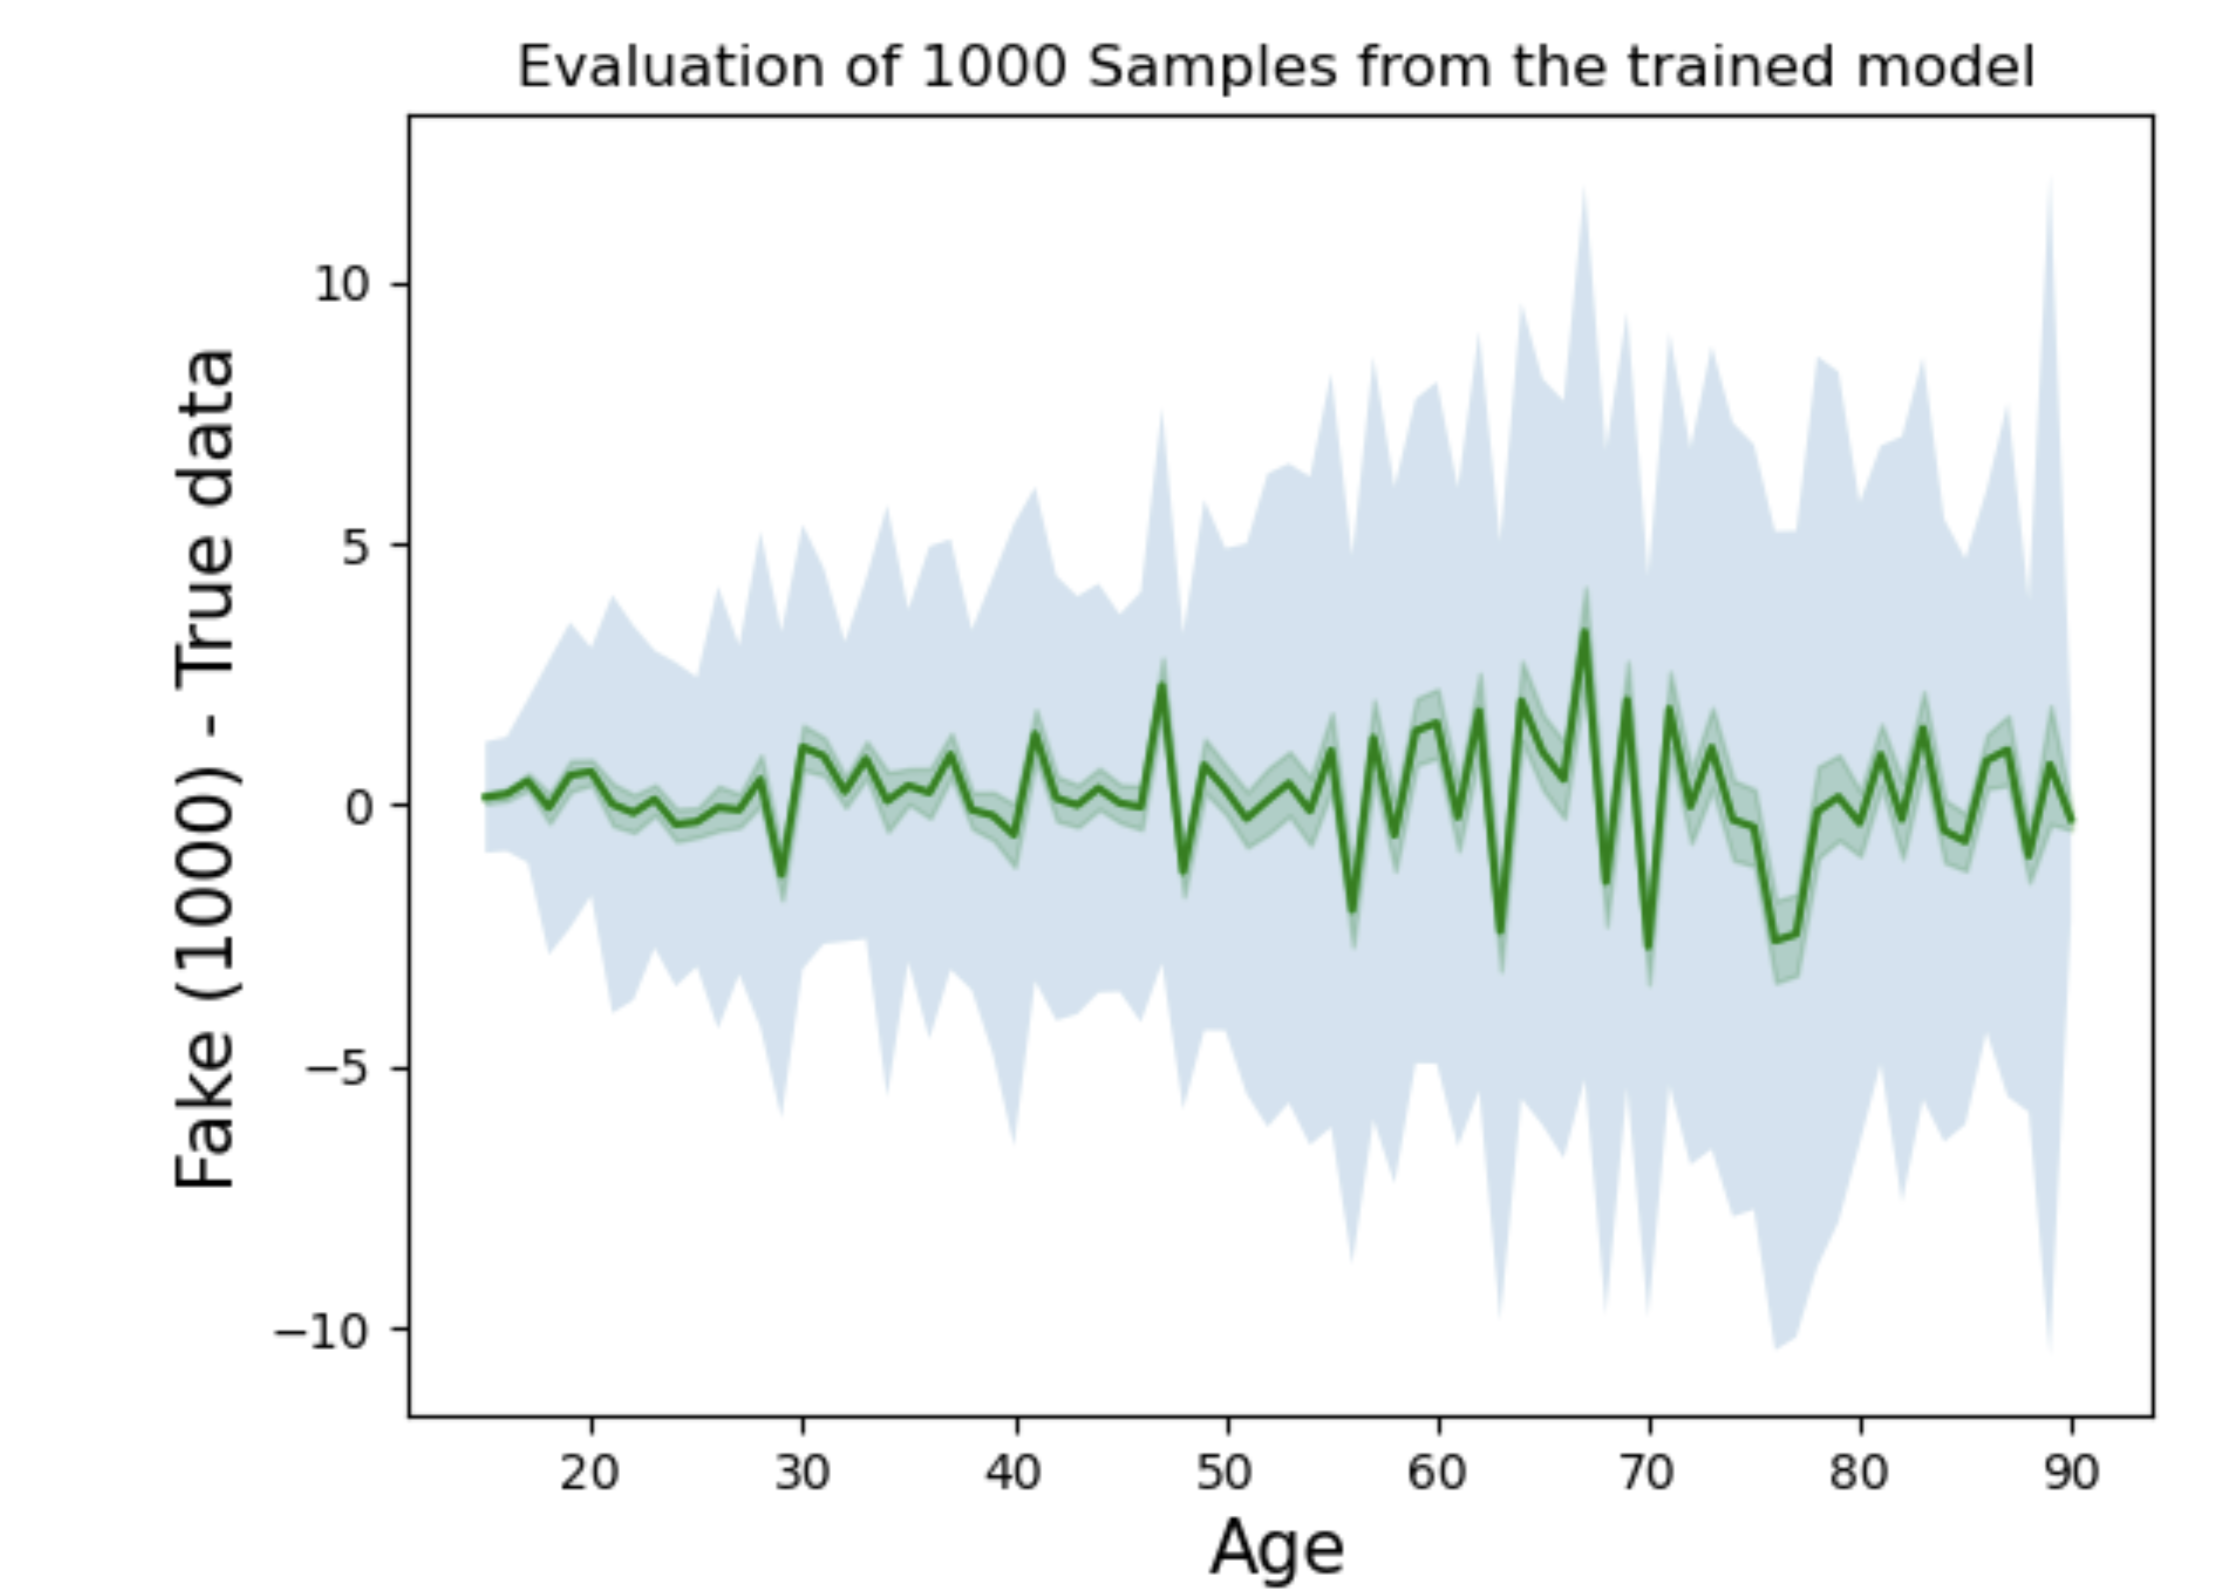


## Summary and discussion

I manually tuned (through random search) these parameters, I tried parallelizing using run.py script as a template

The results as one can is within the expected errors, Hyper parameter optimization coming through. Also, with always training on the same true data there will be very little improvement. I made the following study

* The input data is downsampled by using a fraction of the input data.
* If the downsampling ratio is too high then there could be too not enough statistical stability and might not capture the behaviour of the actual data. 
* If the downsampling ratio is too low then Generator can quickly be over-trained and would not converge.

The effect of downsampling is studied in more detail in [here](https://tensorboard.dev/experiment/NwW8CWa5Qv6teAYj6x6rkQ/)

I am currently working on implementing a hyper-parameter optimization wrapper. THe concept looks like the following

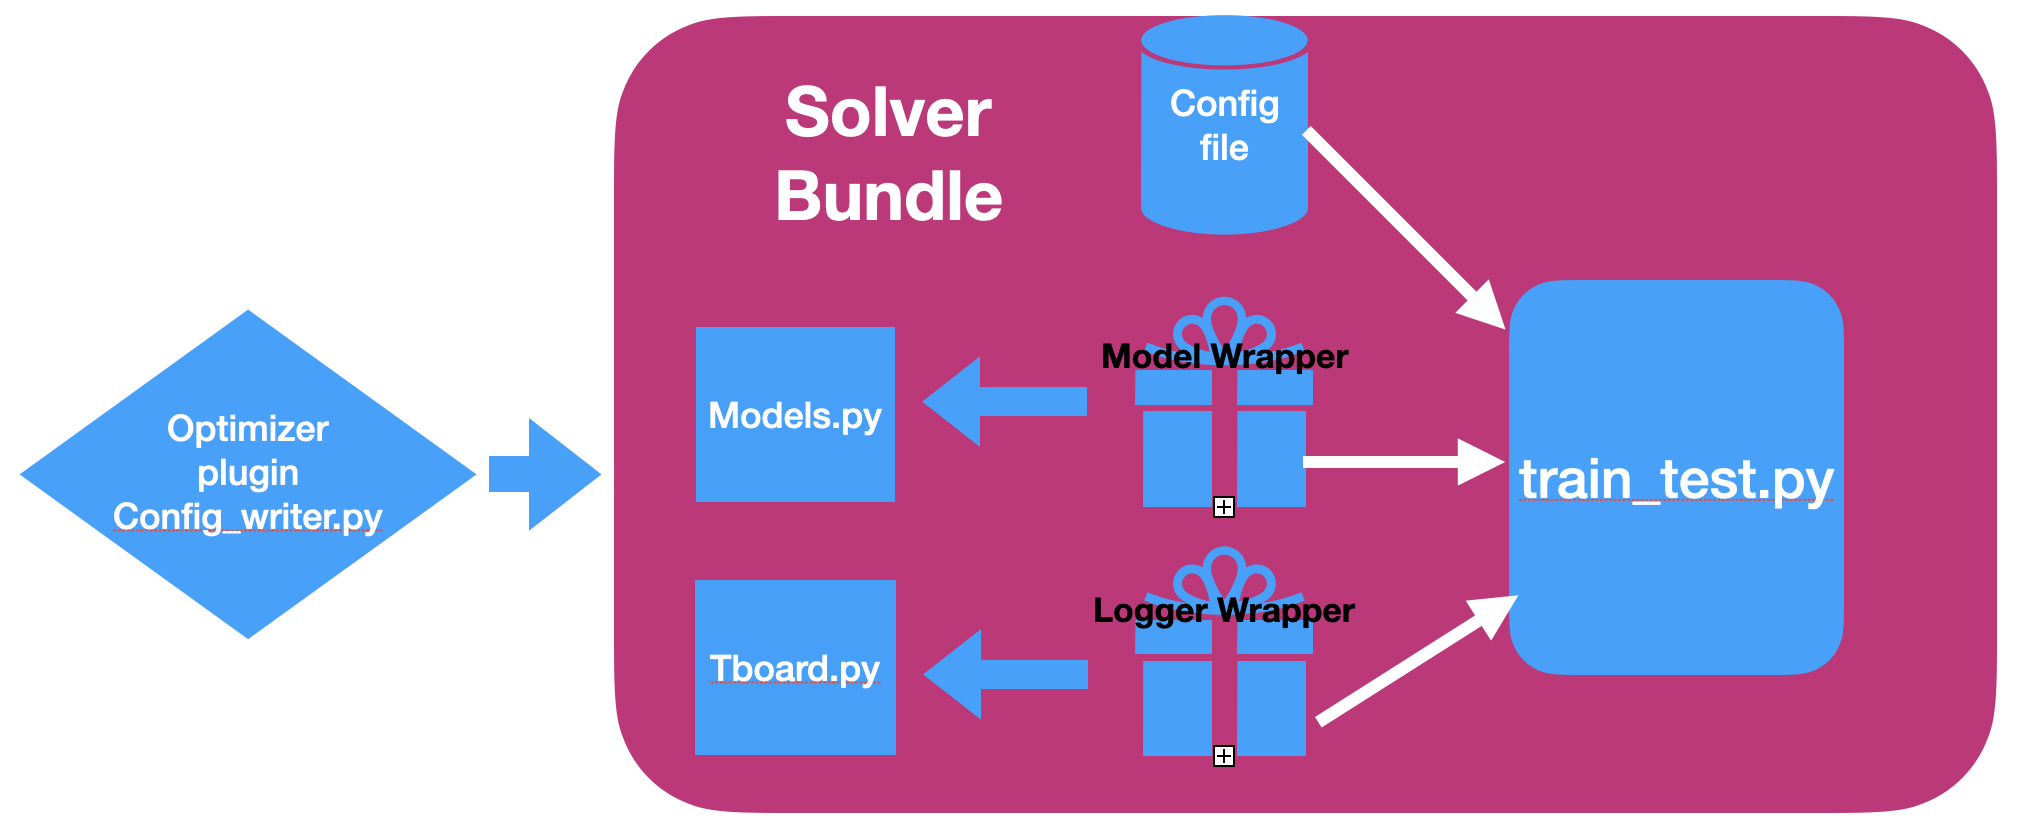





## Exploratory Data Analysis & Data preparation

The data is quite straight forward. There is a 1D PDF that has to be modelled.

Training dataset is prepared in the following fashion

* The input data is downsampled by using a fraction of the input data.
* If the downsampling ratio is too high then there could be too not enough statistical stability and might not capture the behaviour of the actual data. 
* If the downsampling ratio is too low then Generator can quickly be over-trained and would not converge.
* A study was made to make sure, if we can 

The effect of downsampling is studied in more detail in [here](https://tensorboard.dev/experiment/NwW8CWa5Qv6teAYj6x6rkQ/)

## Simple-GAN (Vanilla GAN)

I used a Sequential Fully Connected Neural Network Model for both the Generator and the Discriminator Networks. Normalizing the input training data is very much key for this network to converge (check out the tensorboard [here](https://tensorboard.dev/experiment/vDbLe21kQbGef2JovdbnXQ/#scalars&runSelectionState=eyJleHBlcmltZW50LWZyYWMtMC4xMF8yMDIyLTExLTA3IDA4OjM0OjE2LjIwNzc2NSI6ZmFsc2UsImV4cGVyaW1lbnQtZnJhYy0wLjI1XzIwMjItMTEtMDcgMDg6MzQ6MTYuMjA3NTEwIjp0cnVlLCJleHBlcmltZW50LWZyYWMtMC41MF8yMDIyLTExLTA3IDA4OjQ5OjE3LjIzMzIzMyI6ZmFsc2UsImV4cGVyaW1lbnQtZnJhYy0wLjc1XzIwMjItMTEtMDcgMDg6NDk6MzQuMDAwNDkwIjpmYWxzZX0%3D&run=experiment-frac-0.10_2022-11-07%2008%3A34%3A16.207765))

### The model

In order to preserve the stocastic nature of the training process and at the same time not under-sample the distribution, I made use variable length sampling (`0.45 to 0.75`). Training data contained `10k` samples and testing data contained `1k` sample. the testing sample I used had a sampling fraction of (`0.75 to 0.85`).

For pictorial summary of the training of the data refer `training_Simple-GAN.gif` and for testing refer `testing-Simple-GAN.gif`, One can also find the corresponding tensorboard experimentation [here](https://tensorboard.dev/experiment/UdpCBtlYRwegPf5kjL2gGA/#scalars&run=experiment-long-train)



![Training](training_Simple-GAN.gif)

![Testing](testing_Simple-GAN.gif)

The model file corresponding to the final iteration is also attached in the repo. 

In order to re run the experiment one can simply run 



The code is such that it can be with minimal changes be adapted to other GAN techniques. I am in the process of implementing both Conditional GAN and Deep Convolutional GAN into the code structure.

#### To do

* Change hard coded values of Hyper Parameters in the `Generator` and `Discriminator`
* Implement a hyper parameter optimization wrapper
* Implement a `model_helper` wrapper to choose different types of GAN models.


# END

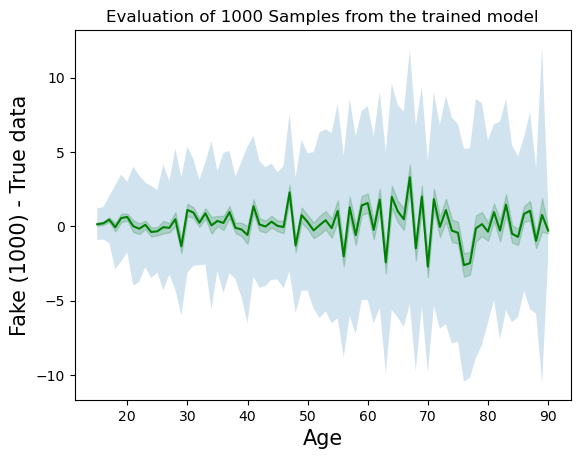

In [33]:
plt.plot(np.arange(15, 91), means - true_data, "g", label = "Fake(1000 sample mean) - True")
plt.fill_between(np.arange(15, 91), means-true_data - std_err/np.sqrt(num_samples), means - true_data + std_err/np.sqrt(num_samples), color = "g", alpha = 0.2)
plt.errorbar(np.arange(15, 91), means*0., color='g', ecolor='g', capsize=0, linewidth=1, alpha = 0.)
plt.fill_between(np.arange(15, 91), means-true_data - std_err, means - true_data + std_err, alpha = 0.2, label = "True data Poissonian Error")
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Fake (1000) - True data", fontsize = 15)
plt.title("Evaluation of 1000 Samples from the trained model")
plt.show()

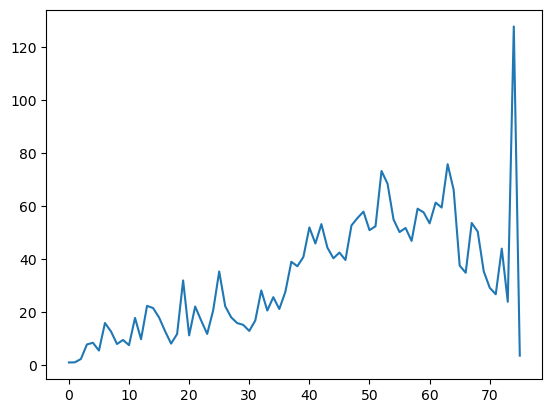

In [29]:
plt.plot(means)

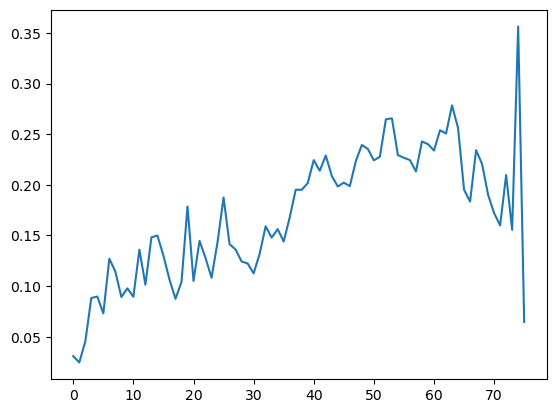

In [140]:
plt.plot(std_err)

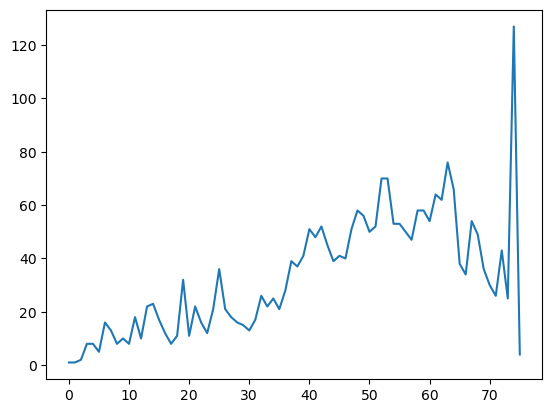

In [171]:
plt.plot(true_data)

In [172]:
true_data

array([  1,   1,   2,   8,   8,   5,  16,  13,   8,  10,   8,  18,  10,
        22,  23,  17,  12,   8,  11,  32,  11,  22,  16,  12,  21,  36,
        21,  18,  16,  15,  13,  17,  26,  22,  25,  21,  28,  39,  37,
        41,  51,  48,  52,  45,  39,  41,  40,  51,  58,  56,  50,  52,
        70,  70,  53,  53,  50,  47,  58,  58,  54,  64,  62,  76,  66,
        38,  34,  54,  49,  36,  30,  26,  43,  25, 127,   4])

(0.0, 3.0)

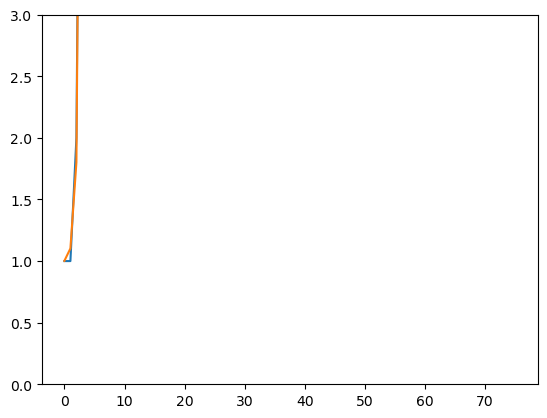

In [177]:
plt.plot(true_data)
plt.plot(predictions[0])
plt.ylim(0, 3)

In [54]:
import glob

from PIL import Image
import sys

from PIL import ImageDraw
from PIL import ImageFont


def make_gif(frame_folder, outname, duration, title):
    frames = [Image.open(frame_folder + str(image).zfill(3) + ".png") for image in range(0, 200)]
    font = ImageFont.truetype("Chalkduster.ttf",24)
    for index, i in enumerate(frames):
        ImageDraw.Draw(i).text((40, 10), f"{title} : {index}", fill =(0, 0, 0), font = font)
    frame_one = frames[0]
    frame_one.save(outname, format="GIF", append_images=frames, save_all=True, duration=duration, loop=0)
output_path = "output/experiment-long-train_Simple-GAN"
make_gif(output_path + "/train_image_plot", "training_evolution_problem2.gif", 500, "Training Epoch")



In [55]:
make_gif(output_path + "/BinbyBinPerformance_", "difference_evolution_problem2.gif", 500, "Training Epoch")
